# Analise Exploratória de Dados

Este Notebook terá as seguinte função:

* Identificar as relações entre os dados com a sobrevivência do passageiro;

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('../datasets/train.csv')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
dataset.rename(columns={
    'Survived' : 'sobreviveu',
    'Pclass': 'classe_social',
    'Name': 'nome',
    'Sex': 'genero',
    'Age': 'idade',
    'SibSp': 'quantos_irmaos|conjugues',
    'Parch': 'quantos_filhos|pais',
    'Ticket': 'passagem',
    'Fare': 'preco_do_ticket',
    'Cabin': 'cabine',
    'Embarked': 'classe_embarcacao'
}, inplace=True)

In [4]:
dataset

,PassengerId,sobreviveu,classe_social,nome,genero,idade,quantos_irmaos|conjugues,quantos_filhos|pais,passagem,preco_do_ticket,cabine,classe_embarcacao
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Demonstrando relações entre os dados

### Verificando Taxa de Sobrevivência

In [5]:
dataset['sobreviveu'].replace(to_replace=[0,1], 
                              value=['não', 'sim'],
                              inplace=True)

<Axes: xlabel='sobreviveu', ylabel='Count'>

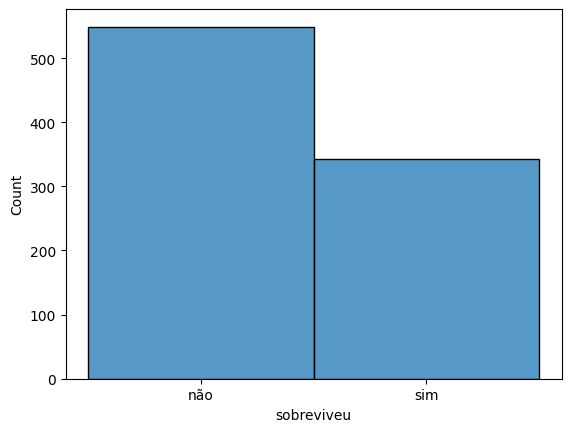

In [6]:
sns.histplot(dataset['sobreviveu'])

### Verificando a relação da Classe social

<Axes: xlabel='classe_social', ylabel='Count'>

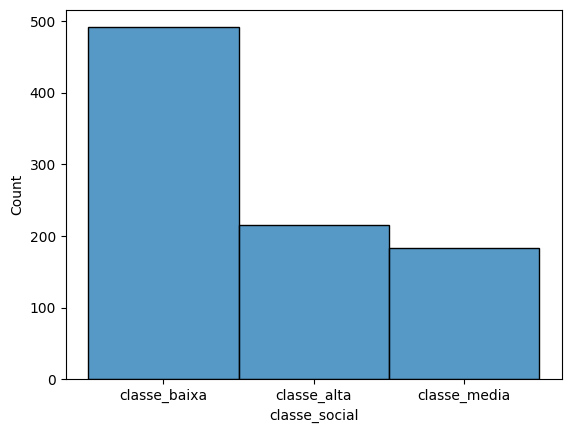

In [7]:
dataset['classe_social'].replace(to_replace=[1,2,3],
                        value=['classe_alta', 'classe_media', 'classe_baixa'],
                        inplace=True)
sns.histplot(dataset['classe_social'])

In [8]:
sobrevivencia_classe = dataset.groupby(
    ['classe_social', 'sobreviveu']
    ).sobreviveu.agg([len]).reset_index()
sobrevivencia_classe

,classe_social,sobreviveu,len
0,classe_alta,não,80
1,classe_alta,sim,136
2,classe_baixa,não,372
3,classe_baixa,sim,119
4,classe_media,não,97
5,classe_media,sim,87


Text(0.5, 0, 'Classe Social')

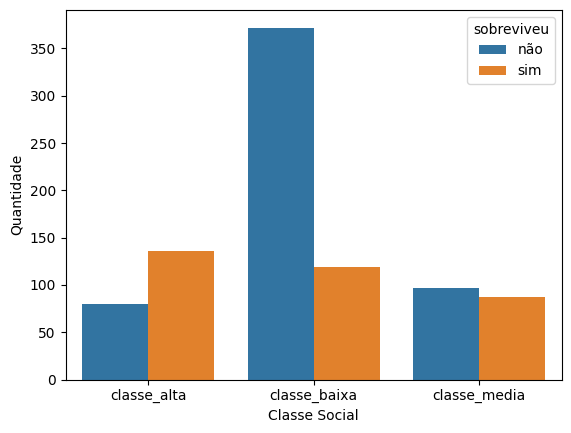

In [9]:
sns.barplot(data=sobrevivencia_classe,
            x='classe_social',
            y='len',
            hue='sobreviveu')

plt.ylabel('Quantidade')
plt.xlabel('Classe Social')

Percentualmente, a classe social vai importar:
* Classe Alta: 63%;
* Classe Baixa: 24%;
* Classe Média: 47%.

### Verificando a relação da Faixa Etária com a classe

<Axes: xlabel='faixa_etaria', ylabel='Count'>

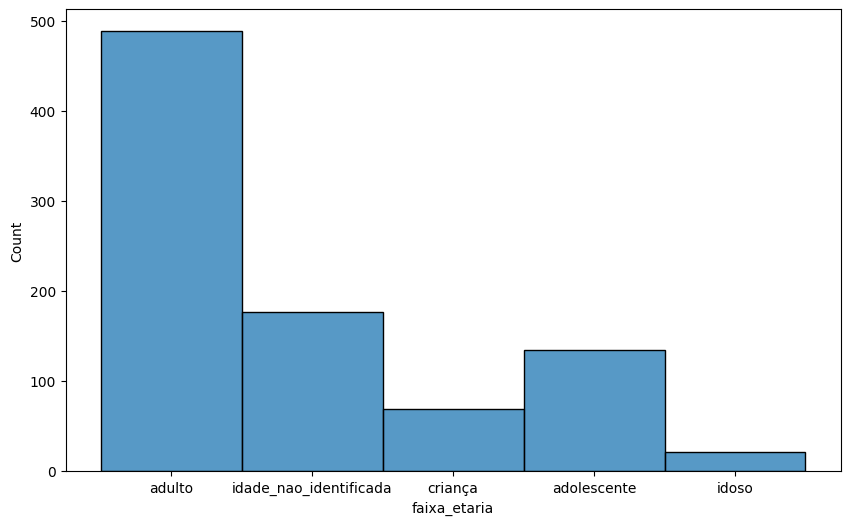

In [10]:
def definir_faixa_etaria(idade: float) -> str:
    if 12 >= idade >= 0:
        return 'criança'
    elif 21 >= idade > 12:
        return 'adolescente'
    elif 60 >= idade > 21:
        return 'adulto'
    elif idade > 60:
        return 'idoso'
    return 'idade_nao_identificada'

dataset['faixa_etaria'] = pd.Series(
    map(definir_faixa_etaria, dataset['idade'])
)

plt.figure(figsize=(10,6))
sns.histplot(dataset['faixa_etaria'])

In [11]:
sobrevivencia_classe_faixa_etaria = dataset.groupby(
    ['classe_social', 'sobreviveu', 'faixa_etaria']
    ).sobreviveu.agg([len]).reset_index()

sobrevivencia_classe_faixa_etaria

,classe_social,sobreviveu,faixa_etaria,len
0,classe_alta,não,adolescente,4
1,classe_alta,não,adulto,48
2,classe_alta,não,criança,1
3,classe_alta,não,idade_nao_identificada,16
4,classe_alta,não,idoso,11
5,classe_alta,sim,adolescente,16
6,classe_alta,sim,adulto,100
7,classe_alta,sim,criança,3
8,classe_alta,sim,idade_nao_identificada,14
9,classe_alta,sim,idoso,3


In [12]:
classe_alta_faixa_etaria = sobrevivencia_classe_faixa_etaria[
    sobrevivencia_classe_faixa_etaria['classe_social'] == 'classe_alta'
    ]
classe_baixa_faixa_etaria = sobrevivencia_classe_faixa_etaria[
    sobrevivencia_classe_faixa_etaria['classe_social'] == 'classe_baixa'
    ]
classe_media_faixa_etaria = sobrevivencia_classe_faixa_etaria[
    sobrevivencia_classe_faixa_etaria['classe_social'] == 'classe_media'
    ]

Text(0.5, 1.0, 'Classe Média')

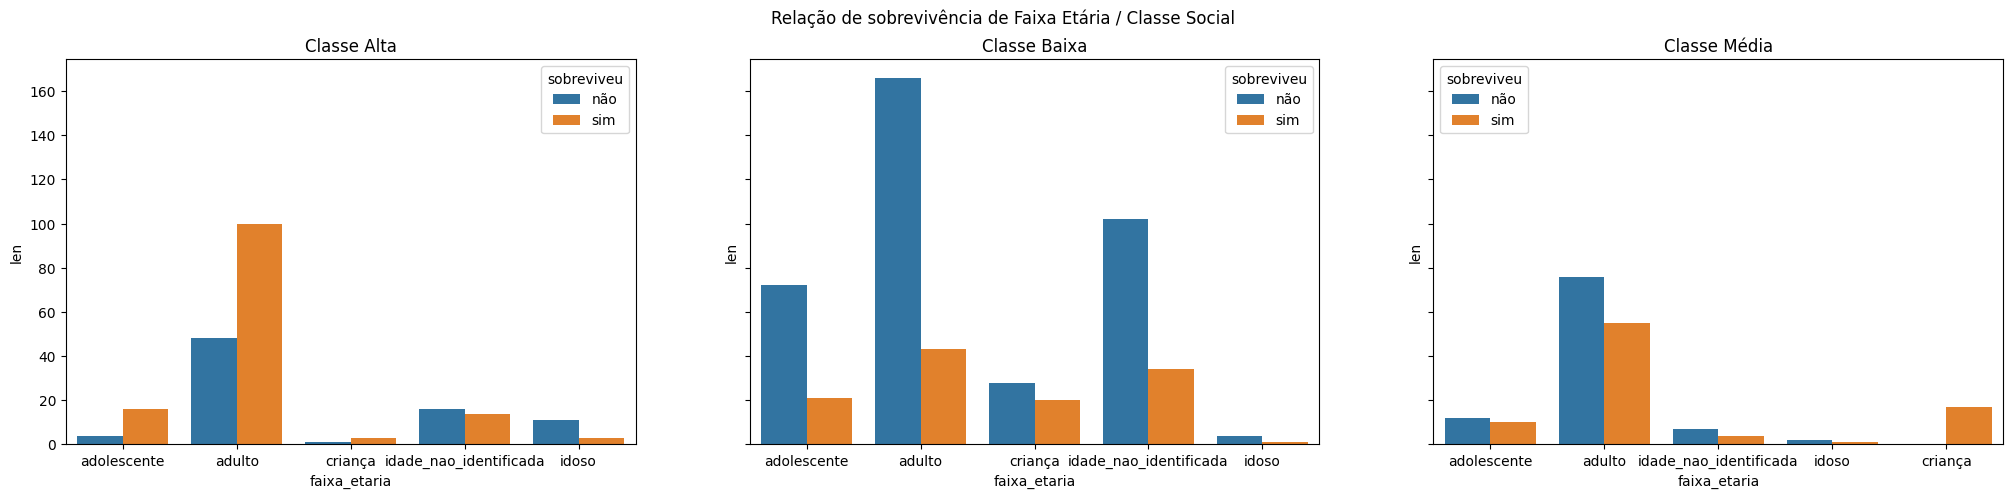

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(25, 5), sharey=True)
fig.suptitle('Relação de sobrevivência de Faixa Etária / Classe Social')

sns.barplot(ax=axes[0], 
            data=classe_alta_faixa_etaria,
            x='faixa_etaria',
            y='len',
            hue='sobreviveu')
axes[0].set_title('Classe Alta')

sns.barplot(ax=axes[1], 
            data=classe_baixa_faixa_etaria,
            x='faixa_etaria',
            y='len',
            hue='sobreviveu')
axes[1].set_title('Classe Baixa')

sns.barplot(ax=axes[2], 
            data=classe_media_faixa_etaria,
            x='faixa_etaria',
            y='len',
            hue='sobreviveu')
axes[2].set_title('Classe Média')



A idade deverá ser levada em consideração quando classificado a sobrevivência, note que a classe Social determina bastante a sobrevivência em porcentagem, mas a idade também significa bastante:
* Criança de Clase Alta: 75%;
* Criança de Classe Baixa: 41%;
* Criança de Classe Média: 100% (Todas as crianças sobreviveram)

### Relação de Sexo com sobrevivência

<Axes: xlabel='genero', ylabel='Count'>

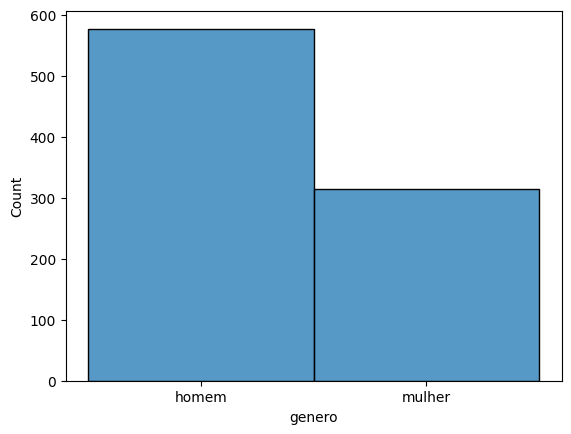

In [38]:
dataset['genero'].replace(to_replace=['female', 'male'],
                          value=['mulher', 'homem'],
                          inplace=True)
sns.histplot(dataset['genero'])

In [15]:
sobrevivencia_sexo = dataset.groupby(
    ['genero', 'sobreviveu']
    ).sobreviveu.agg([len]).reset_index()
sobrevivencia_sexo

,genero,sobreviveu,len
0,homem,não,468
1,homem,sim,109
2,mulher,não,81
3,mulher,sim,233


Text(0.5, 0, 'genero')

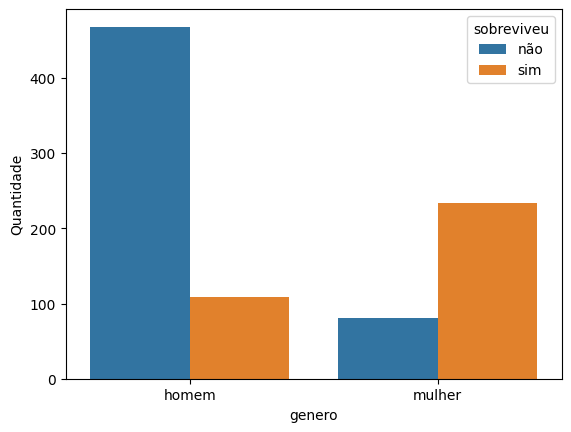

In [16]:
sns.barplot(data=sobrevivencia_sexo,
            x='genero',
            y='len',
            hue='sobreviveu')

plt.ylabel('Quantidade')
plt.xlabel('genero')

* Já temos uma Feature interessante, a partir da identificação do gênero podemos ter um caminho mais preedominante para sobrevivência.

* Considerando a intersecção com valores que já vimos até agora.

* Segue a porcentagem de sobrevivência a partir do gênero:
    
    1. Homem: 18,8%
    2. Mulher: 74,2%

### Relação de gênero com Classe Social

In [17]:
sobrevivencia_classe_genero = dataset.groupby(
    ['classe_social', 'sobreviveu', 'genero']
    ).sobreviveu.agg([len]).reset_index()

sobrevivencia_classe_genero

,classe_social,sobreviveu,genero,len
0,classe_alta,não,homem,77
1,classe_alta,não,mulher,3
2,classe_alta,sim,homem,45
3,classe_alta,sim,mulher,91
4,classe_baixa,não,homem,300
5,classe_baixa,não,mulher,72
6,classe_baixa,sim,homem,47
7,classe_baixa,sim,mulher,72
8,classe_media,não,homem,91
9,classe_media,não,mulher,6


In [18]:
classe_alta_genero = sobrevivencia_classe_genero[
    sobrevivencia_classe_genero['classe_social'] == 'classe_alta'
    ]
classe_baixa_genero = sobrevivencia_classe_genero[
    sobrevivencia_classe_genero['classe_social'] == 'classe_baixa'
    ]
classe_media_genero = sobrevivencia_classe_genero[
    sobrevivencia_classe_genero['classe_social'] == 'classe_media'
    ]

Text(0.5, 1.0, 'Classe Média')

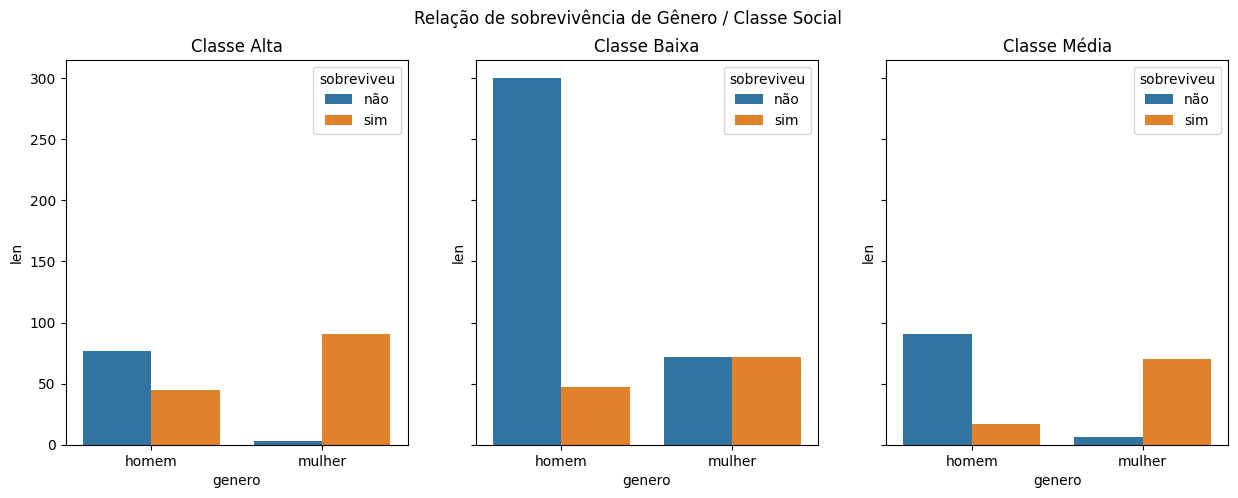

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Relação de sobrevivência de Gênero / Classe Social')

sns.barplot(ax=axes[0], 
            data=classe_alta_genero,
            x='genero',
            y='len',
            hue='sobreviveu')
axes[0].set_title('Classe Alta')

sns.barplot(ax=axes[1], 
            data=classe_baixa_genero,
            x='genero',
            y='len',
            hue='sobreviveu')
axes[1].set_title('Classe Baixa')

sns.barplot(ax=axes[2], 
            data=classe_media_genero,
            x='genero',
            y='len',
            hue='sobreviveu')
axes[2].set_title('Classe Média')

A feature de gênero irá funcionar como preedominante, afinal, caso o passageiro seja homem, preedominantemente ele não irá sobreviver, ao contrário do caso de ser mulher, que no caso de menor probabilidade em relação a classe social, tem 50% de chance.

### Relação de Gênero, Classe Social e Faixa Etária.

In [20]:
sobrevivencia_classe_genero_idade = dataset.groupby(
    ['classe_social', 'sobreviveu', 'genero', 'faixa_etaria']
    ).sobreviveu.agg([len]).reset_index()

sobrevivencia_classe_genero_idade

,classe_social,sobreviveu,genero,faixa_etaria,len
0,classe_alta,não,homem,adolescente,4
1,classe_alta,não,homem,adulto,46
2,classe_alta,não,homem,idade_nao_identificada,16
3,classe_alta,não,homem,idoso,11
4,classe_alta,não,mulher,adulto,2
5,classe_alta,não,mulher,criança,1
6,classe_alta,sim,homem,adolescente,1
7,classe_alta,sim,homem,adulto,35
8,classe_alta,sim,homem,criança,3
9,classe_alta,sim,homem,idade_nao_identificada,5


In [21]:
classe_alta_homem = sobrevivencia_classe_genero_idade[
    (sobrevivencia_classe_genero_idade['classe_social'] == 'classe_alta') &
    (sobrevivencia_classe_genero_idade['genero'] == 'homem')
]

classe_baixa_homem = sobrevivencia_classe_genero_idade[
    (sobrevivencia_classe_genero_idade['classe_social'] == 'classe_baixa') &
    (sobrevivencia_classe_genero_idade['genero'] == 'homem')
]

classe_media_homem = sobrevivencia_classe_genero_idade[
    (sobrevivencia_classe_genero_idade['classe_social'] == 'classe_media') &
    (sobrevivencia_classe_genero_idade['genero'] == 'homem')
]

classe_alta_mulher = sobrevivencia_classe_genero_idade[
    (sobrevivencia_classe_genero_idade['classe_social'] == 'classe_alta') &
    (sobrevivencia_classe_genero_idade['genero'] == 'mulher')
]

classe_baixa_mulher = sobrevivencia_classe_genero_idade[
    (sobrevivencia_classe_genero_idade['classe_social'] == 'classe_baixa') &
    (sobrevivencia_classe_genero_idade['genero'] == 'mulher')
]

classe_media_mulher = sobrevivencia_classe_genero_idade[
    (sobrevivencia_classe_genero_idade['classe_social'] == 'classe_media') &
    (sobrevivencia_classe_genero_idade['genero'] == 'mulher')
]


Text(0.5, 1.0, 'Mulheres de Classe Média')

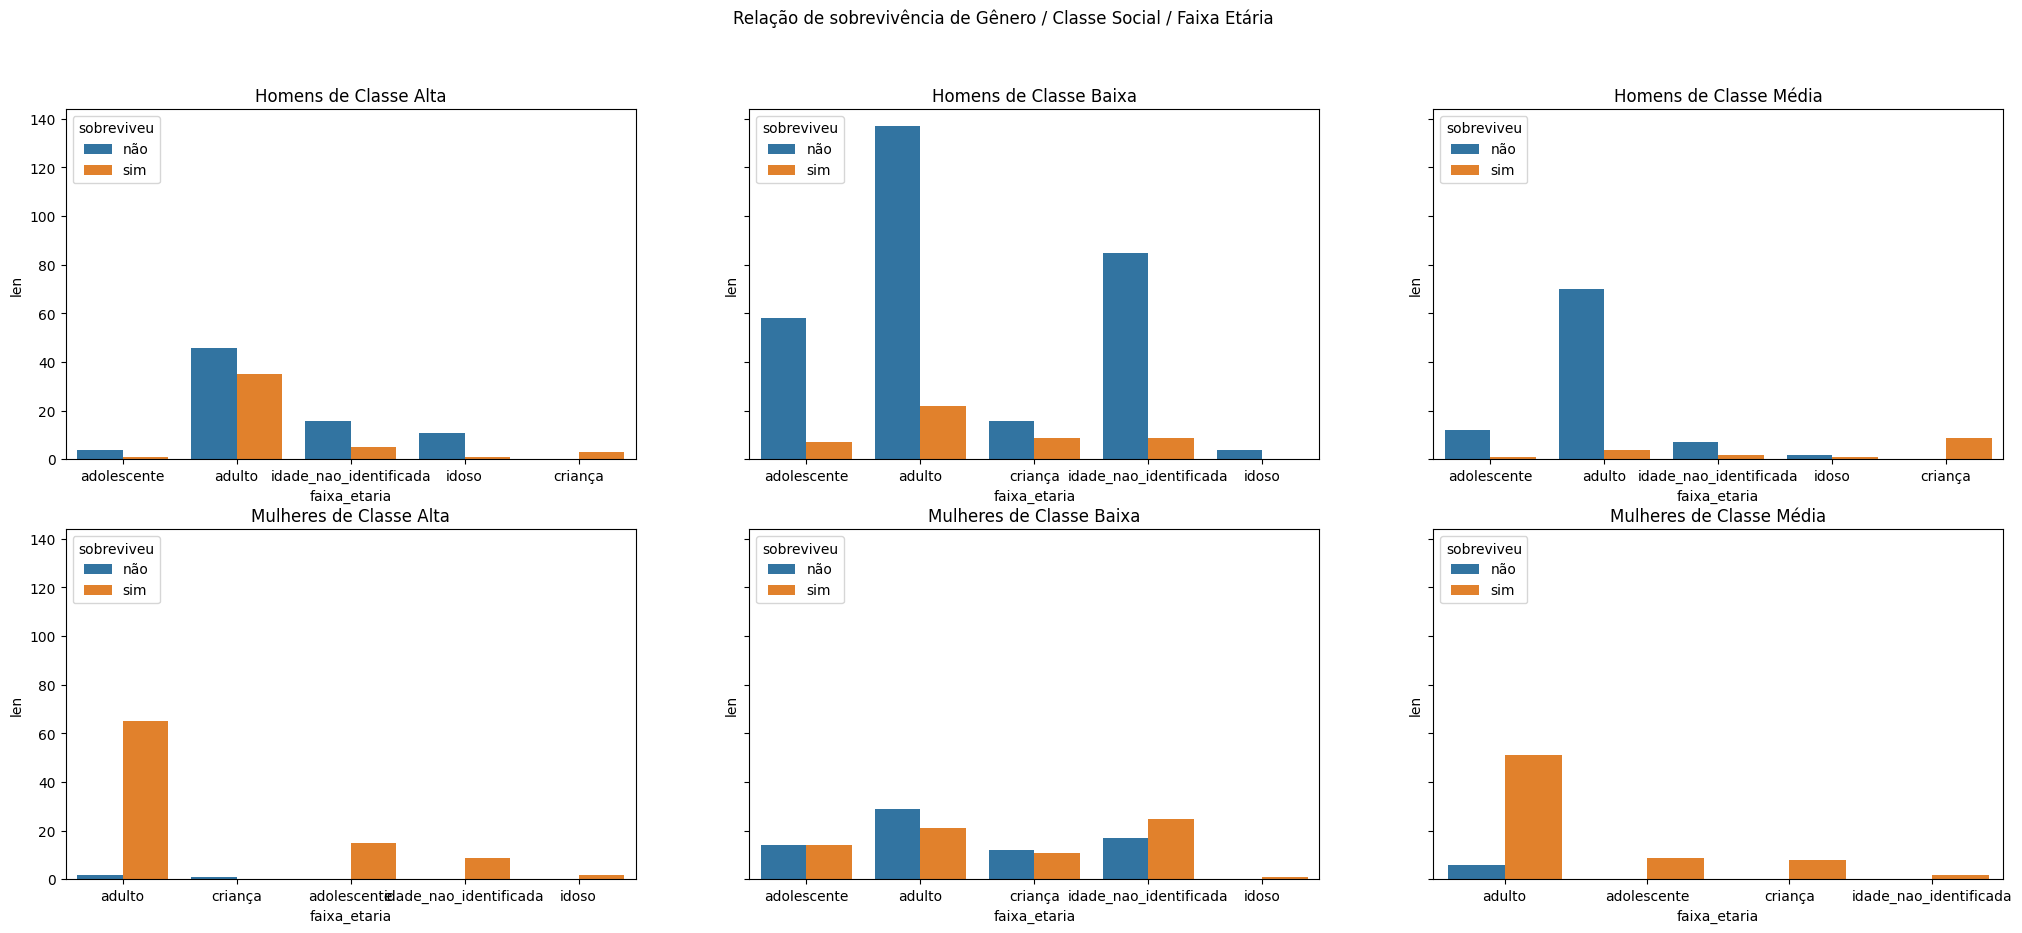

In [22]:
fig, axes = plt.subplots(2, 3, figsize=(25, 10), sharey=True)
fig.suptitle('Relação de sobrevivência de Gênero / Classe Social / Faixa Etária')

sns.barplot(ax=axes[0,0], 
            data=classe_alta_homem,
            x='faixa_etaria',
            y='len',
            hue='sobreviveu')
axes[0,0].set_title('Homens de Classe Alta')

sns.barplot(ax=axes[0,1], 
            data=classe_baixa_homem,
            x='faixa_etaria',
            y='len',
            hue='sobreviveu')
axes[0,1].set_title('Homens de Classe Baixa')

sns.barplot(ax=axes[0,2], 
            data=classe_media_homem,
            x='faixa_etaria',
            y='len',
            hue='sobreviveu')
axes[0,2].set_title('Homens de Classe Média')

sns.barplot(ax=axes[1,0], 
            data=classe_alta_mulher,
            x='faixa_etaria',
            y='len',
            hue='sobreviveu')
axes[1,0].set_title('Mulheres de Classe Alta')

sns.barplot(ax=axes[1,1], 
            data=classe_baixa_mulher,
            x='faixa_etaria',
            y='len',
            hue='sobreviveu')
axes[1,1].set_title('Mulheres de Classe Baixa')

sns.barplot(ax=axes[1,2], 
            data=classe_media_mulher,
            x='faixa_etaria',
            y='len',
            hue='sobreviveu')
axes[1,2].set_title('Mulheres de Classe Média')

Com toda a certeza, o gênero será de enorme importância para identificação de sobrevivência, pois terá um forte peso. As informações a respeito da Classe e Idade serão muito interessantes também, pois elas somadas possuem dados muito interessantes a serem identificados.

### Relação da Tarifa com a sobrevivência

Text(0.5, 1.0, 'Relação da Tarifa do Ticket com a Sobrevivência')

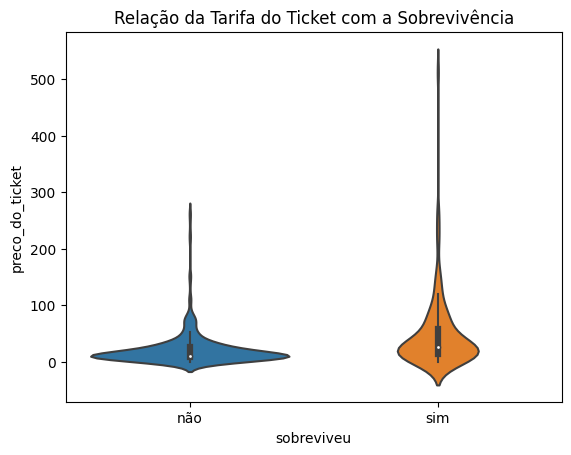

In [23]:
sns.violinplot(data=dataset,
                x='sobreviveu',
                y='preco_do_ticket')

plt.title('Relação da Tarifa do Ticket com a Sobrevivência')

O preço do Ticket se relaciona com a Classe Social do passageiro, sendo uma informação complementar e ainda mais específica que a classe social

<Axes: xlabel='sobreviveu', ylabel='preco_do_ticket'>

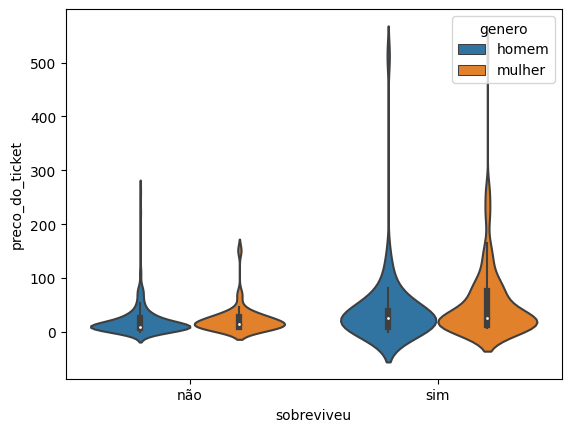

In [24]:
sns.violinplot(data=dataset,
               x='sobreviveu',
               y='preco_do_ticket',
               hue='genero')

Note-se como será interessante para o modelo preditivo identificar a partir do preço de ticket, pois na intersecção de preço e gênero, temos uma informação ainda mais específica na probabilidade de sobrevivência.

Text(0.5, 1.0, 'Idosos')

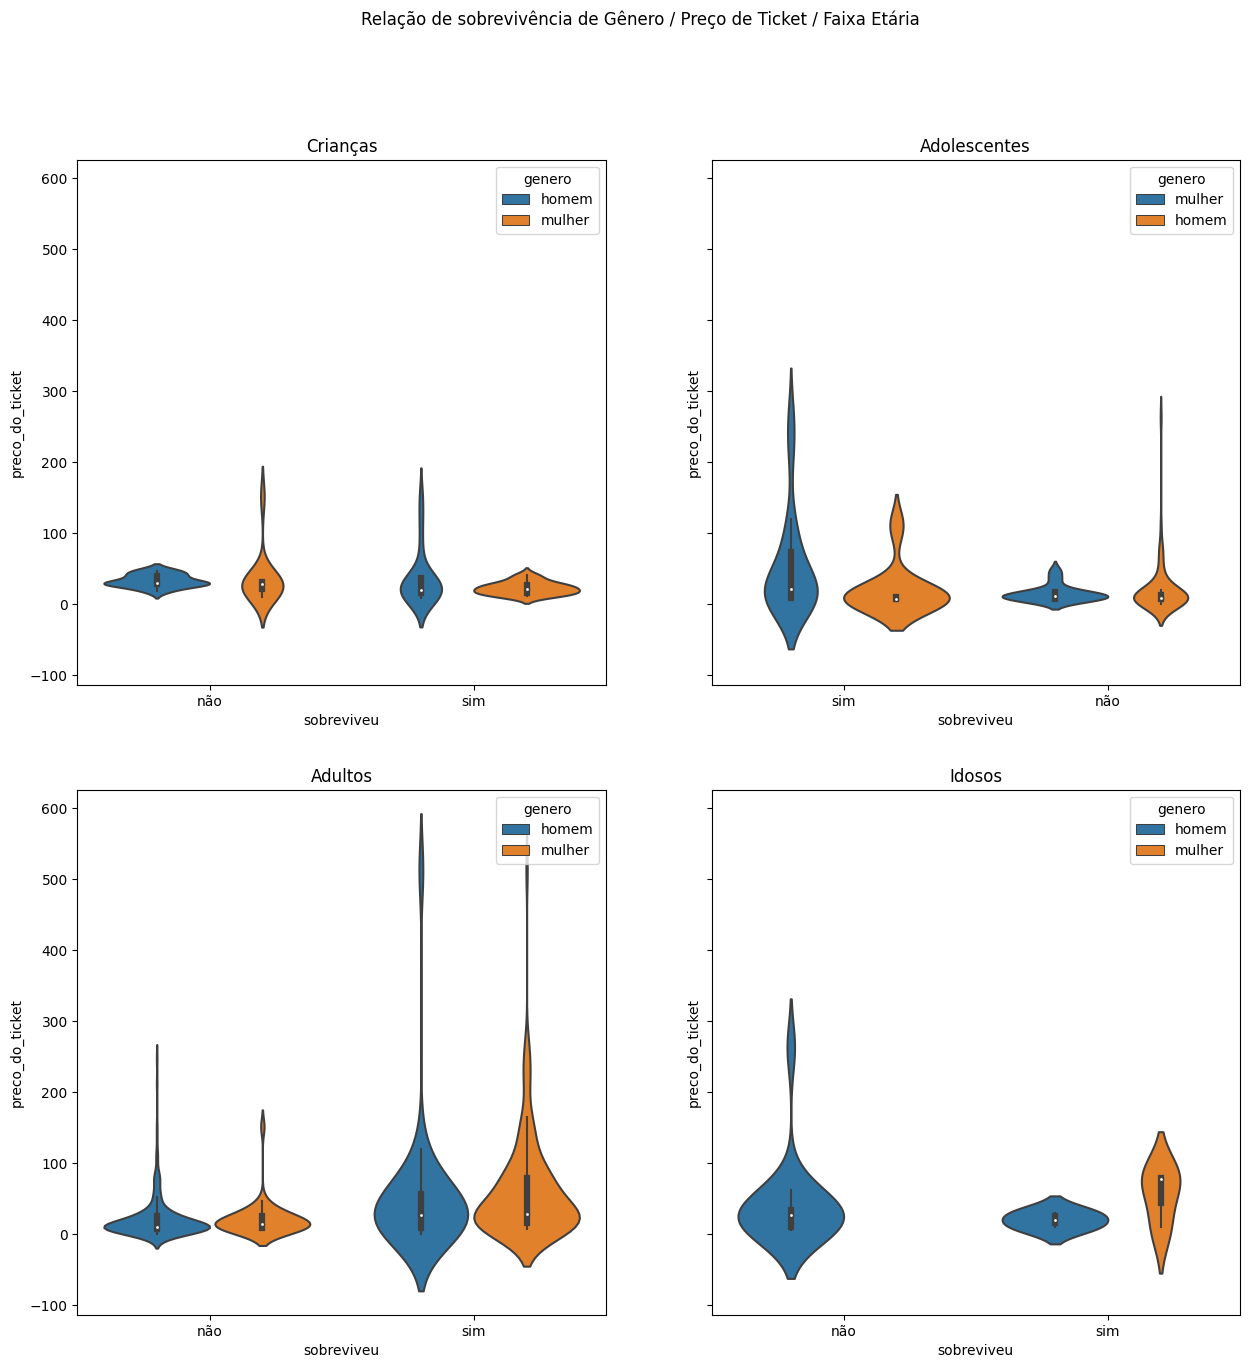

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15), sharey=True)
fig.suptitle('Relação de sobrevivência de Gênero / Preço de Ticket / Faixa Etária')

sns.violinplot(ax=axes[0,0], 
            data=dataset[
                dataset['faixa_etaria'] == 'criança'
            ],
            x='sobreviveu',
            y='preco_do_ticket',
            hue='genero')
axes[0,0].set_title('Crianças')

sns.violinplot(ax=axes[0,1], 
            data=dataset[
                dataset['faixa_etaria'] == 'adolescente'
            ],
            x='sobreviveu',
            y='preco_do_ticket',
            hue='genero')
axes[0,1].set_title('Adolescentes')

sns.violinplot(ax=axes[1,0], 
            data=dataset[
                dataset['faixa_etaria'] == 'adulto'
            ],
            x='sobreviveu',
            y='preco_do_ticket',
            hue='genero')
axes[1,0].set_title('Adultos')

sns.violinplot(ax=axes[1,1], 
            data=dataset[
                dataset['faixa_etaria'] == 'idoso'
            ],
            x='sobreviveu',
            y='preco_do_ticket',
            hue='genero')
axes[1,1].set_title('Idosos')

Text(0.5, 1.0, 'Idade não identificada')

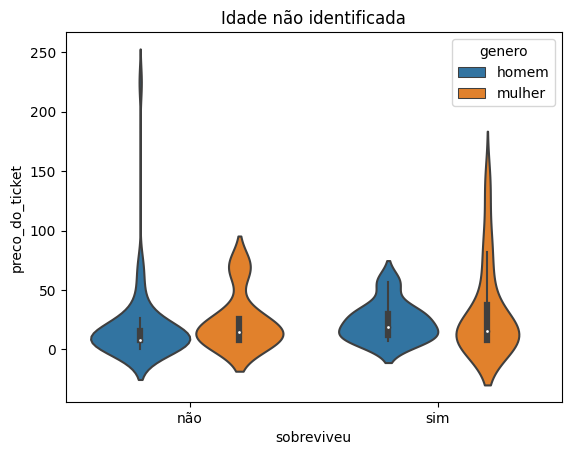

In [26]:
sns.violinplot(data=dataset[
                dataset['faixa_etaria'] == 'idade_nao_identificada'
            ],
            x='sobreviveu',
            y='preco_do_ticket',
            hue='genero')
plt.title('Idade não identificada')

O preço do Ticket é interessante para a identificação de sobreviventes em um preço mais alto, embora que em preços baixos ela não tenha predominância para garantir acerto na sobrevivência.

### Relação do Embarque

<Axes: xlabel='classe_embarcacao', ylabel='Count'>

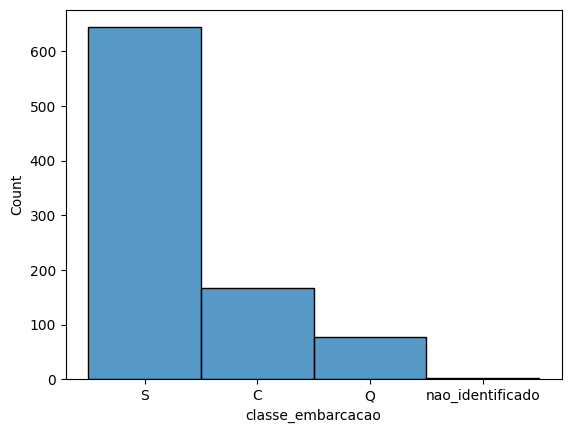

In [39]:
dataset['classe_embarcacao'].fillna(value='nao_identificado', 
                                    inplace=True)

sns.histplot(dataset['classe_embarcacao'])

In [28]:
sobrevivencia_embarque = dataset.groupby(
    ['classe_embarcacao', 'sobreviveu']
    ).sobreviveu.agg([len]).reset_index()
sobrevivencia_embarque

,classe_embarcacao,sobreviveu,len
0,C,não,75
1,C,sim,93
2,Q,não,47
3,Q,sim,30
4,S,não,427
5,S,sim,217
6,nao_identificado,sim,2


<Axes: xlabel='classe_embarcacao', ylabel='len'>

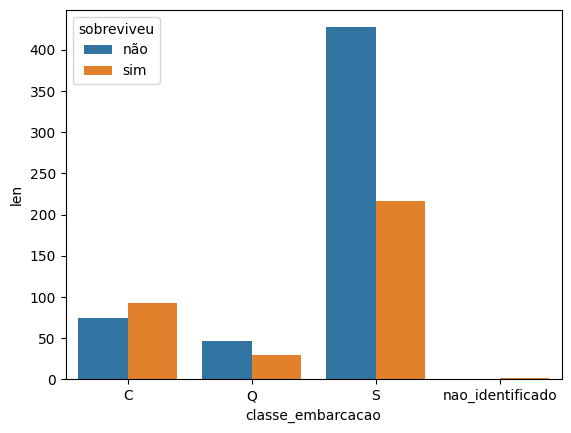

In [29]:
sns.barplot(data=sobrevivencia_embarque,
            x='classe_embarcacao',
            y='len',
            hue='sobreviveu')

In [30]:
sobrevivencia_embarque_classe = dataset.groupby(
    ['classe_embarcacao', 'sobreviveu', 'classe_social']
    ).sobreviveu.agg([len]).reset_index()
sobrevivencia_embarque_classe

,classe_embarcacao,sobreviveu,classe_social,len
0,C,não,classe_alta,26
1,C,não,classe_baixa,41
2,C,não,classe_media,8
3,C,sim,classe_alta,59
4,C,sim,classe_baixa,25
5,C,sim,classe_media,9
6,Q,não,classe_alta,1
7,Q,não,classe_baixa,45
8,Q,não,classe_media,1
9,Q,sim,classe_alta,1


In [31]:
classe_alta_embarque = sobrevivencia_embarque_classe[
    sobrevivencia_embarque_classe['classe_social'] == 'classe_alta'
]

classe_baixa_embarque = sobrevivencia_embarque_classe[
    sobrevivencia_embarque_classe['classe_social'] == 'classe_baixa'
]

classe_media_embarque = sobrevivencia_embarque_classe[
    sobrevivencia_embarque_classe['classe_social'] == 'classe_media'
]

Text(0.5, 1.0, 'Classe Média')

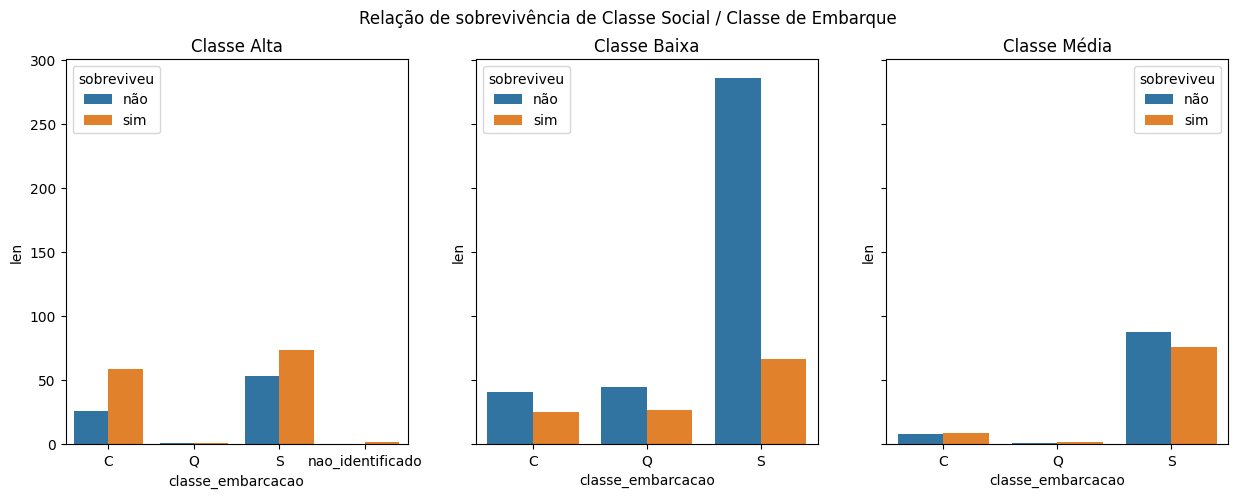

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Relação de sobrevivência de Classe Social / Classe de Embarque')

sns.barplot(ax=axes[0], 
            data=classe_alta_embarque,
            x='classe_embarcacao',
            y='len',
            hue='sobreviveu')
axes[0].set_title('Classe Alta')

sns.barplot(ax=axes[1], 
            data=classe_baixa_embarque,
            x='classe_embarcacao',
            y='len',
            hue='sobreviveu')
axes[1].set_title('Classe Baixa')

sns.barplot(ax=axes[2], 
            data=classe_media_embarque,
            x='classe_embarcacao',
            y='len',
            hue='sobreviveu')
axes[2].set_title('Classe Média')

A relação do Embarque com a Classe Social mostra que a Classe do Embarque apenas mantém as informações vistas das classes Sociais, não demonstrando alguma preedominância ou critério de desempate para a classificação da sobrevivência.

### Experimento com idade em formato numérico

Text(0.5, 1.0, 'Relação da Idade com a Sobrevivência')

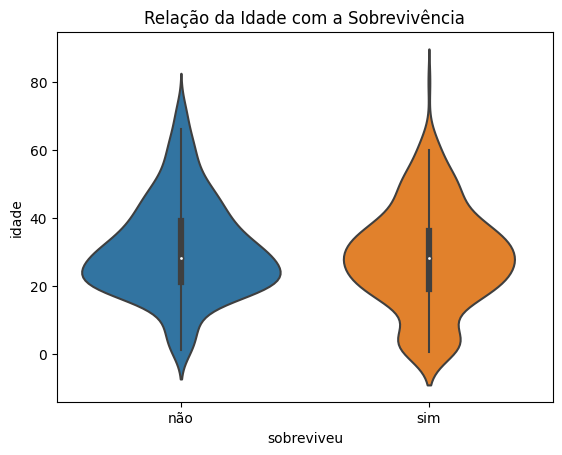

In [34]:
sns.violinplot(data=dataset,
               y='idade',
               x='sobreviveu')

plt.title('Relação da Idade com a Sobrevivência')

Será interessante existir a informação de idade como valor numérico, afinal, ela será mais específica que a faixa etária, entretanto já foi visto que tem estatísticas muito interessantes quando separamos as idades em faixas etárias.

# Conclusões a respeito do Notebook

* As informações a respeito de gênero serão extremamente importantes, pois estatísticamente, o gênero influencia bastante a questão da sobrevivência;
* A divisão de idades em faixa etária além de semânticamente facilitar o entendimento na relação da idade com outras classes, também é interessante para identificar a probabilidade de sobrevivência.
* A classe Social se mostrou muito interessante, justamente por ser um dado categórico de tão baixa cardinalidade e ter a relação com as outras colunas que permitem identificar a sobrevivência, além que o preço da tarifa se relaciona com esta informação, sendo mais específico para a identificação de sobreviventes.
* Classe de Embarcação se mostrou ser uma informação confusa, pois não é demonstrado uma preedominância que valida a sua importância no aprendizado de máquina
---
* Classes que serão utilizadas em experimentos:
    1. Gênero
    2. Idade
    3. Faixa Etária (Classe criada a partir do proposto neste notebook)
    4. Classe Social
    5. Preço do Ticket
---
* Classes que podem ser utilizadas futuramente:
    1. Classe de Embarcação
---
* Classes que não serão utilizadas:
    1. Quantos irmãos ou cônjuges, pois é uma informação tão específica que correrá o risco de Overfitting;
    2. Quantos filhos ou pais, mesmo motivo da primeira;
    3. Passagem, Alta Cardinalidade da classe, sendo uma informação não interessante;
    4. Cabine, mesmo motivo do Ticket. 